# **Trabalho Prático: Previsão de sucesso filmes**

## Descrição do Problema

* Se o filme fez mais dinheiro do que gastou, então considera-se que o filme teve sucesso.
* O objetivo deste projeto é prever se realmente fez mais dinheiro ou não a partir de outros atributos.

## Preparação do programa

### Bibliotecas e Funções

In [42]:
import numpy as np
import sklearn as skl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, plot_confusion_matrix

#Modelo a usar
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

#Métricas de qualidade
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_poisson_deviance

### Leitura dos datasets

In [2]:
df = pd.read_csv('movies.csv')

## Exploração dos dados

Para esta etapa do trabalho, também se utilizou as informações obtidas no website "kaggle", tais como:
* Tipos dos atributos
* Conteúdo dos atributos
* Missing values

### Visualização dos dados

In [3]:
df.shape

(7668, 15)

In [4]:
df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [5]:
df.tail()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0
7667,Tee em el,NaN,Horror,2020,"August 19, 2020 (United States)",5.7,7.0,Pereko Mosia,Pereko Mosia,Siyabonga Mabaso,South Africa,NaN,NaN,PK 65 Films,102.0


### Informações sobre os diferentes atributos

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [7]:
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [8]:
df.describe(include=object)

,name,rating,genre,released,director,writer,star,country,company
count,7668,7591,7668,7666,7668,7665,7667,7665,7651
unique,7512,12,19,3414,2949,4535,2814,59,2385
top,Nobody's Fool,R,Comedy,"February 14, 1986 (United States)",Woody Allen,Woody Allen,Nicolas Cage,United States,Universal Pictures
freq,3,3697,2245,9,38,37,43,5475,377


### Matriz de Correlação

<AxesSubplot:>

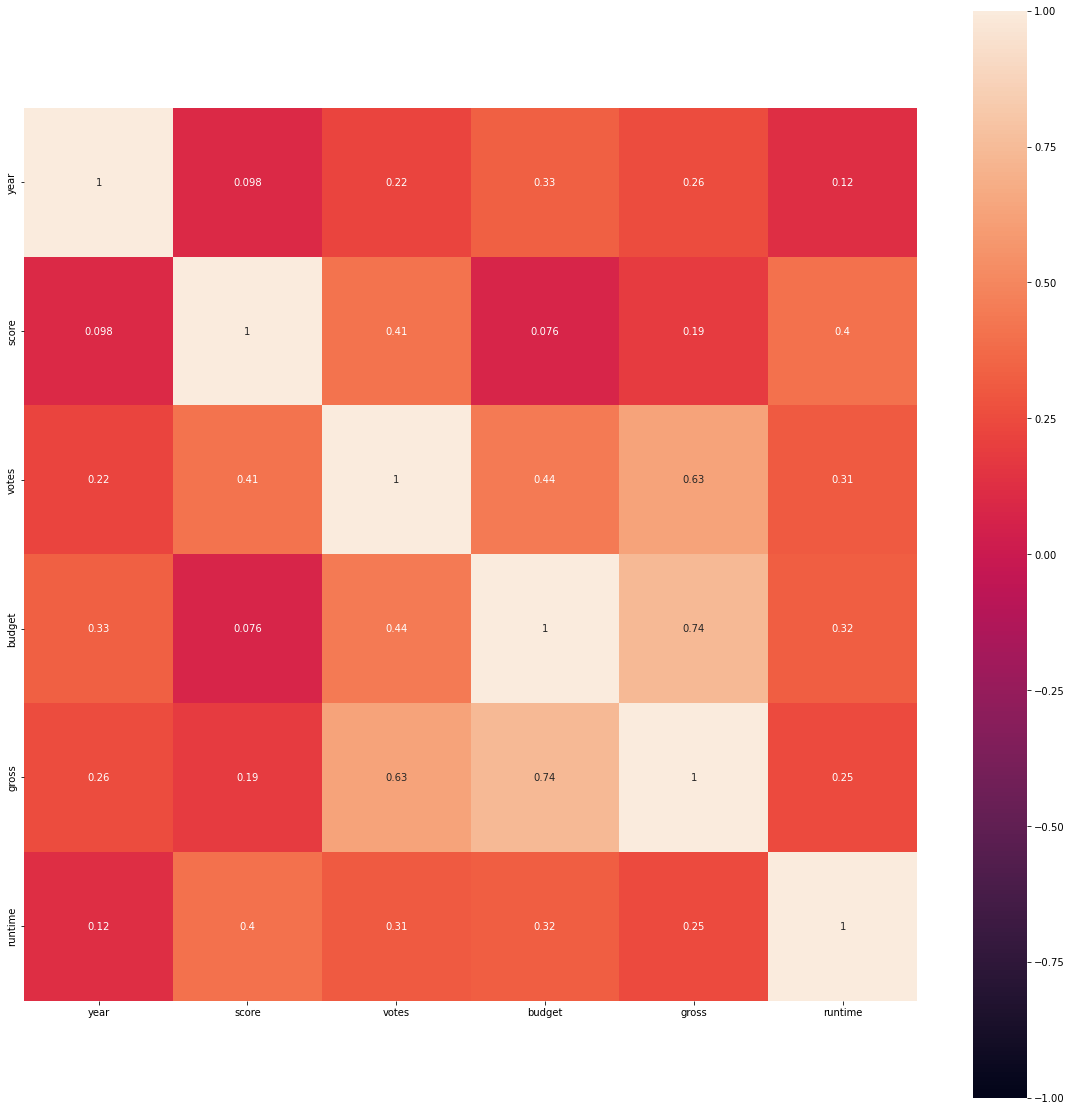

In [9]:
corr_matrix = df.corr()
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True)

## Preparação dos dados

### Tratamento de valores em falta

In [10]:
print("Shape of data: ", df.shape)
print("Duplicated rows: ", df.duplicated(keep=False).sum())
print("-" * 40)
print("Missing values count:\n", df.isnull().sum())
print("-" * 40)
print("If drop all NAs: ", df.dropna().shape)

Shape of data:  (7668, 15)
Duplicated rows:  0
----------------------------------------
Missing values count:
 name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64
----------------------------------------
If drop all NAs:  (5421, 15)


In [11]:
float_cols = df.drop('name', axis=1).dtypes[df.dtypes == 'float64'].index.tolist()
int_cols = df.drop('name', axis=1).dtypes[df.dtypes == 'int64'].index.tolist()
cat_cols = df.drop('name', axis=1).dtypes[df.dtypes == 'object'].index.tolist()
num_cols = float_cols + int_cols
binary = [x for x in num_cols if len(df[x].unique()) == 2]
num_not_binary = [x for x in num_cols if x not in binary]

print("Numerical variables: ", num_cols)
print("Numerical continuous variables: ", float_cols)
print("Numerical discrete variables: ", int_cols)
print("Numerical and not binary variables: ", num_not_binary)
print("Binary variables: ", binary)
print("Categorical variables: ", cat_cols)

Numerical variables:  ['score', 'votes', 'budget', 'gross', 'runtime', 'year']
Numerical continuous variables:  ['score', 'votes', 'budget', 'gross', 'runtime']
Numerical discrete variables:  ['year']
Numerical and not binary variables:  ['score', 'votes', 'budget', 'gross', 'runtime', 'year']
Binary variables:  []
Categorical variables:  ['rating', 'genre', 'released', 'director', 'writer', 'star', 'country', 'company']


#### String to Dates

Limpar datas que não correspondem 

In [12]:
i = 0
r = 0
for row in df['released']:
    row = str(row).split(' (')
    try:
        pd.to_datetime(datetime.strptime(row[0], '%B %d, %Y'))
    except ValueError:
        df.at[i, 'released'] = pd.NA
        r = r+1
        
    i = i+1

df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

print("Dropped", r, "rows")

df['released'] = df['released'].apply(lambda x: x.split(' ('))

Dropped 59 rows


In [13]:
df['released_date'] =  df['released'].apply(lambda x: x[0])
df['released_date'] = pd.to_datetime(df['released_date'] , format='%B %d, %Y')
df['released_country'] =  df['released'].apply(lambda x: x[1][:-1])

In [14]:
df['released_year']  = df['released_date'].dt.year
df['released_month'] = df['released_date'].dt.month
df['released_day']   = df['released_date'].dt.day
df['released_dayOfWeek']   = df['released_date'].dt.dayofweek

In [15]:
#df = df.drop(["released"], axis=1)
df = df.drop(["released_date"], axis=1)

Unificar ratings

In [16]:
to_replace = {'TV-MA': 'NC-17',
              'X': 'NC-17',
              'Unrated': 'Not Rated',
              'Approved': 'PG-13'}
df['rating'] = df['rating'].replace(to_replace = to_replace)
df['rating'].value_counts(normalize=True)

R            0.478454
PG-13        0.319956
PG           0.167376
G            0.020529
Not Rated    0.010912
NC-17        0.002774
Name: rating, dtype: float64

Condensar genres

In [17]:
genre_counts = df['genre'].value_counts()
genre_counts

Comedy       1494
Action       1414
Drama         859
Crime         396
Adventure     327
Biography     310
Animation     277
Horror        251
Fantasy        40
Mystery        16
Sci-Fi          6
Thriller        6
Romance         5
Family          4
Western         2
Name: genre, dtype: int64

In [18]:
main_genres = []
for i in range(len(genre_counts)):
    if genre_counts[i] > 20:
        main_genres.append(genre_counts.index[i])
main_genres

['Comedy',
 'Action',
 'Drama',
 'Crime',
 'Adventure',
 'Biography',
 'Animation',
 'Horror',
 'Fantasy']

In [19]:
df['genre'] = df['genre'].apply(lambda x: 'Other' if x not in main_genres else x)
print(df['genre'].value_counts(normalize=True))
pd.pivot_table(df, columns = 'genre', values = 'name', aggfunc ='count')

Comedy       0.276308
Action       0.261513
Drama        0.158868
Crime        0.073238
Adventure    0.060477
Biography    0.057333
Animation    0.051230
Horror       0.046421
Fantasy      0.007398
Other        0.007213
Name: genre, dtype: float64


genre,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Fantasy,Horror,Other
name,1414,327,277,310,1494,396,859,40,251,39


Condensar countries

In [20]:
country_counts = df['country'].value_counts().head(20)
country_counts

United States     4310
United Kingdom     490
Canada             111
France             104
Germany             82
Australia           42
Japan               28
China               26
Hong Kong           24
Ireland             21
Italy               19
Spain               18
New Zealand         18
South Korea         13
Mexico              10
Denmark             10
India                8
Czech Republic       7
Sweden               5
South Africa         4
Name: country, dtype: int64

In [21]:
main_countries = []
for i in range(len(country_counts)):
    if country_counts[i] > 25:
        main_countries.append(country_counts.index[i])
main_countries

['United States',
 'United Kingdom',
 'Canada',
 'France',
 'Germany',
 'Australia',
 'Japan',
 'China']

In [22]:
df['country'] = df['country'].apply(lambda x: 'Other' if x not in main_countries else x)
pd.pivot_table(df, columns = 'country', values = 'name' ,aggfunc ='count')

country,Australia,Canada,China,France,Germany,Japan,Other,United Kingdom,United States
name,42,111,26,104,82,28,214,490,4310


Variáveis relacionadas com a produção

In [23]:
df = df.reset_index(drop=True).copy()

# create empty columns
df['director_experience'] = np.nan
df['writer_experience'] = np.nan
df['star_experience'] = np.nan
df['company_experience'] = np.nan

# calculate experience and save calculated values in new columns
for i in range(len(df)):
    df.loc[i, 'director_experience'] = len(df[(df['director'] == df.loc[i]['director']) 
                                                  & (df['year'] < df.loc[i]['year'])])
    df.loc[i, 'writer_experience'] = len(df[(df['writer'] == df.loc[i]['writer']) 
                                                  & (df['year'] < df.loc[i]['year'])])
    df.loc[i, 'star_experience'] = len(df[(df['star'] == df.loc[i]['star']) 
                                                  & (df['year'] < df.loc[i]['year'])])
    df.loc[i, 'company_experience'] = len(df[(df['company'] == df.loc[i]['company']) 
                                                  & (df['year'] < df.loc[i]['year'])])

# reorder columns
data_clean = df[['rating', 'genre', 'released', 'year', 'score', 'votes', 'director', 'director_experience',
                          'writer', 'writer_experience', 'star', 'star_experience', 'country', 
                          'budget', 'gross', 'company', 'company_experience', 'runtime']].copy()    
data_clean.head()

,rating,genre,released,year,score,votes,director,director_experience,writer,writer_experience,star,star_experience,country,budget,gross,company,company_experience,runtime
0,R,Drama,"[June 13, 1980, United States)]",1980,8.4,927000.0,Stanley Kubrick,0.0,Stephen King,0.0,Jack Nicholson,0.0,United Kingdom,19000000.0,46998772.0,Warner Bros.,0.0,146.0
1,R,Adventure,"[July 2, 1980, United States)]",1980,5.8,65000.0,Randal Kleiser,0.0,Henry De Vere Stacpoole,0.0,Brooke Shields,0.0,United States,4500000.0,58853106.0,Columbia Pictures,0.0,104.0
2,PG,Action,"[June 20, 1980, United States)]",1980,8.7,1200000.0,Irvin Kershner,0.0,Leigh Brackett,0.0,Mark Hamill,0.0,United States,18000000.0,538375067.0,Lucasfilm,0.0,124.0
3,PG,Comedy,"[July 2, 1980, United States)]",1980,7.7,221000.0,Jim Abrahams,0.0,Jim Abrahams,0.0,Robert Hays,0.0,United States,3500000.0,83453539.0,Paramount Pictures,0.0,88.0
4,R,Comedy,"[July 25, 1980, United States)]",1980,7.3,108000.0,Harold Ramis,0.0,Brian Doyle-Murray,0.0,Chevy Chase,0.0,United States,6000000.0,39846344.0,Orion Pictures,0.0,98.0


### Nova Matriz de Correlação

<AxesSubplot:>

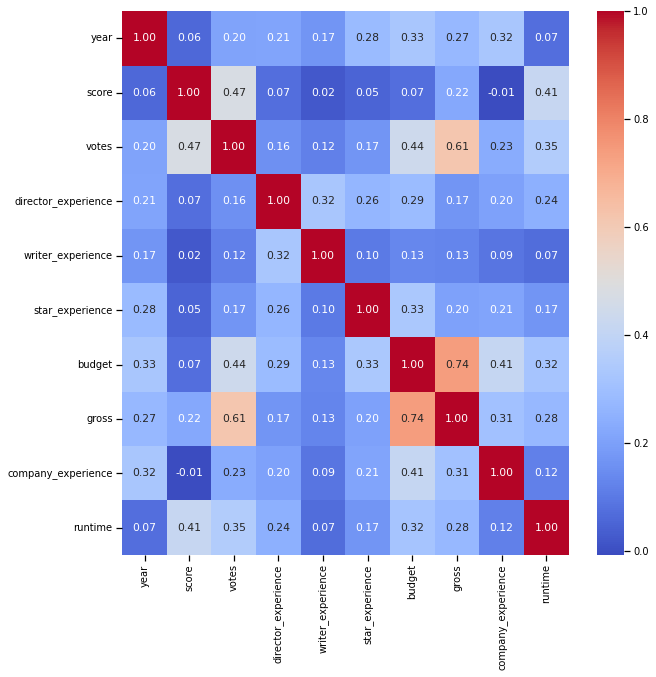

In [24]:
sns.set_context('notebook', font_scale=0.9)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(ax=ax, data=data_clean.corr(), annot=True, fmt= '.2f', cmap='coolwarm')

### Pairplot

### Histogramas

### Alteração do tipo dos atributos

#### Label Encoding

In [25]:
label_encoder = preprocessing.LabelEncoder()

#Train
data_clean['rating'] = label_encoder.fit_transform(data_clean['rating'])
data_clean['genre'] = label_encoder.fit_transform(data_clean['genre'])
data_clean['country'] = label_encoder.fit_transform(data_clean['country'])

In [26]:
data_clean = data_clean.drop(['released'], axis = 1)
data_clean = data_clean.drop(['director'], axis = 1)
data_clean = data_clean.drop(['writer'], axis = 1)
data_clean = data_clean.drop(['star'], axis = 1)
data_clean = data_clean.drop(['company'], axis = 1)

#### Tipo do atributo dependente

## Modelos

### Preparação prévia

#### Separação da variável dependente

In [27]:
X_train = data_clean.drop(['gross'], axis=1)
Y_train = data_clean['gross'].to_frame()

#### Separação entre dataframe de teste e de treino

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.25, random_state=42)

### Treino dos modelos

### Linear Regression

In [29]:
LinReg_param_grid = {'fit_intercept':[True,False], 
              'normalize':[True,False], 
              'copy_X':[True, False], 
              } 
LinReg = linear_model.LinearRegression()
print(LinReg.get_params().keys())
LinReg_grid = GridSearchCV(LinReg, LinReg_param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True, verbose=1)
LinReg_grid.fit(X_train, Y_train.values.ravel())
print(LinReg_grid.best_params_)
print(LinReg_grid.best_score_)

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize', 'positive'])
Fitting 5 folds for each of 8 candidates, totalling 40 fits


c:\Users\Utilizador\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
c:\Users\Utilizador\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipelin

{'copy_X': True, 'fit_intercept': True, 'normalize': True}
-1.1408801655042956e+16


c:\Users\Utilizador\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
c:\Users\Utilizador\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipelin

##### Previsões

In [30]:
LinReg = linear_model.LinearRegression(copy_X= True, fit_intercept = True, normalize = True)
LinReg.fit(X_train,Y_train)
LinReg_predictions = LinReg_grid.predict(X_test)

c:\Users\Utilizador\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


##### Métricas de Qualidade

In [31]:
print('Mean Absolute Error:', skl.metrics.mean_absolute_error(Y_test, LinReg_predictions))
print('Mean Squared Error:', skl.metrics.mean_squared_error(Y_test, LinReg_predictions))
print('Root Mean Squared Error:', np.sqrt(skl.metrics.mean_squared_error(Y_test, LinReg_predictions)))
print('R2 Score:', skl.metrics.r2_score(Y_test, LinReg_predictions))
print('Explained Variance Score:', skl.metrics.explained_variance_score(Y_test, LinReg_predictions))

Mean Absolute Error: 58906938.755584896
Mean Squared Error: 1.3559293775270028e+16
Root Mean Squared Error: 116444380.60838328
R2 Score: 0.6712251911824622
Explained Variance Score: 0.6719103576851198


### SVR (péssima)

In [32]:
SVR_model_param_grid = {'C':[1, 10, 100, 1000],
                'gamma' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
                }

SVR_model = SVR()
SVR_model_grid = GridSearchCV(SVR_model, SVR_model_param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True, verbose=1)
SVR_model_grid.fit(X_train, Y_train.values.ravel())
print(SVR_model_grid.best_params_)
print(SVR_model_grid.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
{'C': 1000, 'gamma': 0.1}
-3.734280485937586e+16


##### Previsões

In [39]:
SVR_model = SVR(C = 1000, gamma = 'scale')
SVR_model.fit(X_train,Y_train)
SVR_model_predictions = SVR_model_grid.predict(X_test)

c:\Users\Utilizador\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


##### Métricas de Qualidade

In [40]:
print('Mean Absolute Error:', skl.metrics.mean_absolute_error(Y_test, SVR_model_predictions))
print('Mean Squared Error:', skl.metrics.mean_squared_error(Y_test, SVR_model_predictions))
print('Root Mean Squared Error:', np.sqrt(skl.metrics.mean_squared_error(Y_test, SVR_model_predictions)))
print('R2 Score:', skl.metrics.r2_score(Y_test, SVR_model_predictions))
print('Explained Variance Score:', skl.metrics.explained_variance_score(Y_test, SVR_model_predictions))

Mean Absolute Error: 91625368.10199165
Mean Squared Error: 4.543046302071309e+16
Root Mean Squared Error: 213144230.5592931
R2 Score: -0.10156119055173418
Explained Variance Score: 1.3325754943949164e-09


### Decision Tree

In [34]:
regDT_param_grid = {'criterion':['squared_error', 'absolute_error'], 
              'max_depth':[20, 19], 
              'ccp_alpha':[820, 840], 
              'min_samples_leaf':[18, 19], 
              'min_weight_fraction_leaf':[0.0001,0.001]} 
regDT = DecisionTreeRegressor()
print(regDT.get_params().keys())
regDT_grid = GridSearchCV(regDT, regDT_param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True, verbose=1)
regDT_grid.fit(X_train, Y_train.values.ravel())
print(regDT_grid.best_params_)
print(regDT_grid.best_score_)

dict_keys(['ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])
Fitting 5 folds for each of 32 candidates, totalling 160 fits
{'ccp_alpha': 820, 'criterion': 'absolute_error', 'max_depth': 20, 'min_samples_leaf': 18, 'min_weight_fraction_leaf': 0.001}
-1.1163883872699516e+16


##### Previsões

In [35]:
regDT= DecisionTreeRegressor(ccp_alpha = 820, criterion = 'absolute_error', max_depth = 20, min_samples_leaf = 18, min_weight_fraction_leaf = 0.0001)
regDT.fit(X_train,Y_train)
regDT_predictions = regDT_grid.predict(X_test)

##### Métricas de Qualidade

In [36]:
print('Mean Absolute Error:', skl.metrics.mean_absolute_error(Y_test, regDT_predictions))
print('Mean Squared Error:', skl.metrics.mean_squared_error(Y_test, regDT_predictions))
print('Root Mean Squared Error:', np.sqrt(skl.metrics.mean_squared_error(Y_test, regDT_predictions)))
print('R2 Score:', skl.metrics.r2_score(Y_test, regDT_predictions))
print('Explained Variance Score:', skl.metrics.explained_variance_score(Y_test, regDT_predictions))

Mean Absolute Error: 49788912.823594674
Mean Squared Error: 1.3712908300105504e+16
Root Mean Squared Error: 117102127.64978057
R2 Score: 0.667500470199833
Explained Variance Score: 0.6726325013673902


#### Boosting (falta nos outros!!)

In [37]:
# Param grid for XGBoost
# param_grid = {'n_estimators': [], 'max_depth': [], 'learning_rate': [], 'subsample': [], 'n_thread': []}
param_grid = {'n_estimators': [100, 200], 'max_depth': [3, 4], 'learning_rate': [0.1, 0.2], 'subsample': [0.5, 0.6], 'n_thread': [4, 5]}

In [38]:
from xgboost import XGBClassifier
import xgboost as xgb

model = xgb.XGBRegressor()
grid = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True, verbose=0)
grid.fit(X_train, Y_train.values.ravel())

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
grid.best_params_

In [ ]:
predictions = grid.predict(X_test)

In [ ]:
print('Mean Absolute Error:', skl.metrics.mean_absolute_error(Y_test, predictions))
print('Mean Squared Error:', skl.metrics.mean_squared_error(Y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(skl.metrics.mean_squared_error(Y_test, predictions)))
print('R2 Score:', skl.metrics.r2_score(Y_test, predictions))

### Random Forest

In [44]:
RandFor_param_grid = {'max_features': ['auto', 'sqrt','log2'],
                    'n_estimators': [100, 500, 1000, 2000]}
RandFor = RandomForestRegressor()
print(RandFor.get_params().keys())
RandFor_grid = GridSearchCV(RandFor, RandFor_param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True, verbose=1)
RandFor_grid.fit(X_train, Y_train.values.ravel())
print(RandFor_grid.best_params_)
print(RandFor_grid.best_score_)

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])
Fitting 5 folds for each of 12 candidates, totalling 60 fits


c:\Users\Utilizador\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\Utilizador\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\Utilizador\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

{'max_features': 'sqrt', 'n_estimators': 500}
-8831286249303802.0


##### Previsões

In [45]:
RandFor = RandomForestRegressor()
RandFor.fit(X_train,Y_train)
RandFor_predictions = RandFor_grid.predict(X_test)

C:\Users\Utilizador\AppData\Local\Temp\ipykernel_2232\1921106861.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandFor.fit(X_train,Y_train)


##### Métricas de Qualidade

In [46]:
print('Mean Absolute Error:', skl.metrics.mean_absolute_error(Y_test, RandFor_predictions))
print('Mean Squared Error:', skl.metrics.mean_squared_error(Y_test, RandFor_predictions))
print('Root Mean Squared Error:', np.sqrt(skl.metrics.mean_squared_error(Y_test, RandFor_predictions)))
print('R2 Score:', skl.metrics.r2_score(Y_test, RandFor_predictions))
print('Explained Variance Score:', skl.metrics.explained_variance_score(Y_test, RandFor_predictions))

Mean Absolute Error: 44291515.97619083
Mean Squared Error: 8844261893973440.0
Root Mean Squared Error: 94043935.97661382
R2 Score: 0.7855514777158483
Explained Variance Score: 0.7856647295197293


### MLP Regressor

In [ ]:
mlp_param_grid = {'solver': ['lbfgs'], 
                    'max_iter': [500,1000,1500],
                    'alpha': 10.0 ** -np.arange(1, 7),
                    'hidden_layer_sizes':np.arange(5, 12)}

mlp = MLPRegressor()
print(mlp.get_params().keys())
mlp_grid = GridSearchCV(mlp, mlp_param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True, verbose=1)
mlp_grid.fit(X_train, Y_train.values.ravel())
print(mlp_grid.best_params_)
print(mlp_grid.best_score_)

dict_keys(['activation', 'alpha', 'batch_size', 'beta_1', 'beta_2', 'early_stopping', 'epsilon', 'hidden_layer_sizes', 'learning_rate', 'learning_rate_init', 'max_fun', 'max_iter', 'momentum', 'n_iter_no_change', 'nesterovs_momentum', 'power_t', 'random_state', 'shuffle', 'solver', 'tol', 'validation_fraction', 'verbose', 'warm_start'])
Fitting 5 folds for each of 126 candidates, totalling 630 fits


c:\Users\Utilizador\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Utilizador\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Utilizador\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.



{'alpha': 1e-05, 'hidden_layer_sizes': 11, 'max_iter': 1500, 'solver': 'lbfgs'}
-1.0868697688568492e+16


##### Previsões

In [ ]:
mlp= MLPRegressor(alpha = 1e-05, hidden_layer_sizes = 11, max_iter = 1500, solver = 'lbfgs')
mlp.fit(X_train,Y_train)
mlp_predictions = mlp_grid.predict(X_test)

c:\Users\Utilizador\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


##### Métricas de Qualidade


In [ ]:
print('Mean Absolute Error:', skl.metrics.mean_absolute_error(Y_test, mlp_predictions))
print('Mean Squared Error:', skl.metrics.mean_squared_error(Y_test, mlp_predictions))
print('Root Mean Squared Error:', np.sqrt(skl.metrics.mean_squared_error(Y_test, mlp_predictions)))
print('R2 Score:', skl.metrics.r2_score(Y_test, mlp_predictions))
print('Explained Variance Score:', skl.metrics.explained_variance_score(Y_test, mlp_predictions))

Mean Absolute Error: 53104790.85078055
Mean Squared Error: 1.224301052071171e+16
Root Mean Squared Error: 110648138.35176672
R2 Score: 0.7031413648814511
Explained Variance Score: 0.7032084573479145
